***About Dataset***

**This dataset encapsulates a diverse array of features, including temperature, humidity, occupancy, HVAC and lighting usage, renewable energy contributions, and more. Each timestamp provides a snapshot of a hypothetical environment, allowing for in-depth analysis and modeling of energy consumption behaviors. Dive into the nuances of this synthetic dataset, designed to emulate real-world scenarios, and unravel the complexities that influence energy usage. Whether you are delving into predictive modeling or honing your data analysis skills, this dataset offers a dynamic playground for experimentation and discovery.**

In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [72]:
import pandas as pd
import os

# Correct file path
file_path = "C:/Users/user/Desktop/Energy/Energy_consumption.csv"

# Check if the file exists before reading
if os.path.exists(file_path):
    print("File found! ✅")
    energy_df = pd.read_csv(file_path)
    
    # Display dataset shape and first few rows
    display(energy_df.shape)
    display(energy_df.head())
else:
    print("File not found! ❌ Check the path.")


File found! ✅


(1000, 11)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [73]:
energy_df['Timestamp'] = pd.to_datetime(energy_df['Timestamp'], utc=True, infer_datetime_format=True)
energy_df = energy_df.set_index('Timestamp')
energy_df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00+00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00+00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00+00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00+00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00+00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [74]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):

    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=30)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=30)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=30)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax


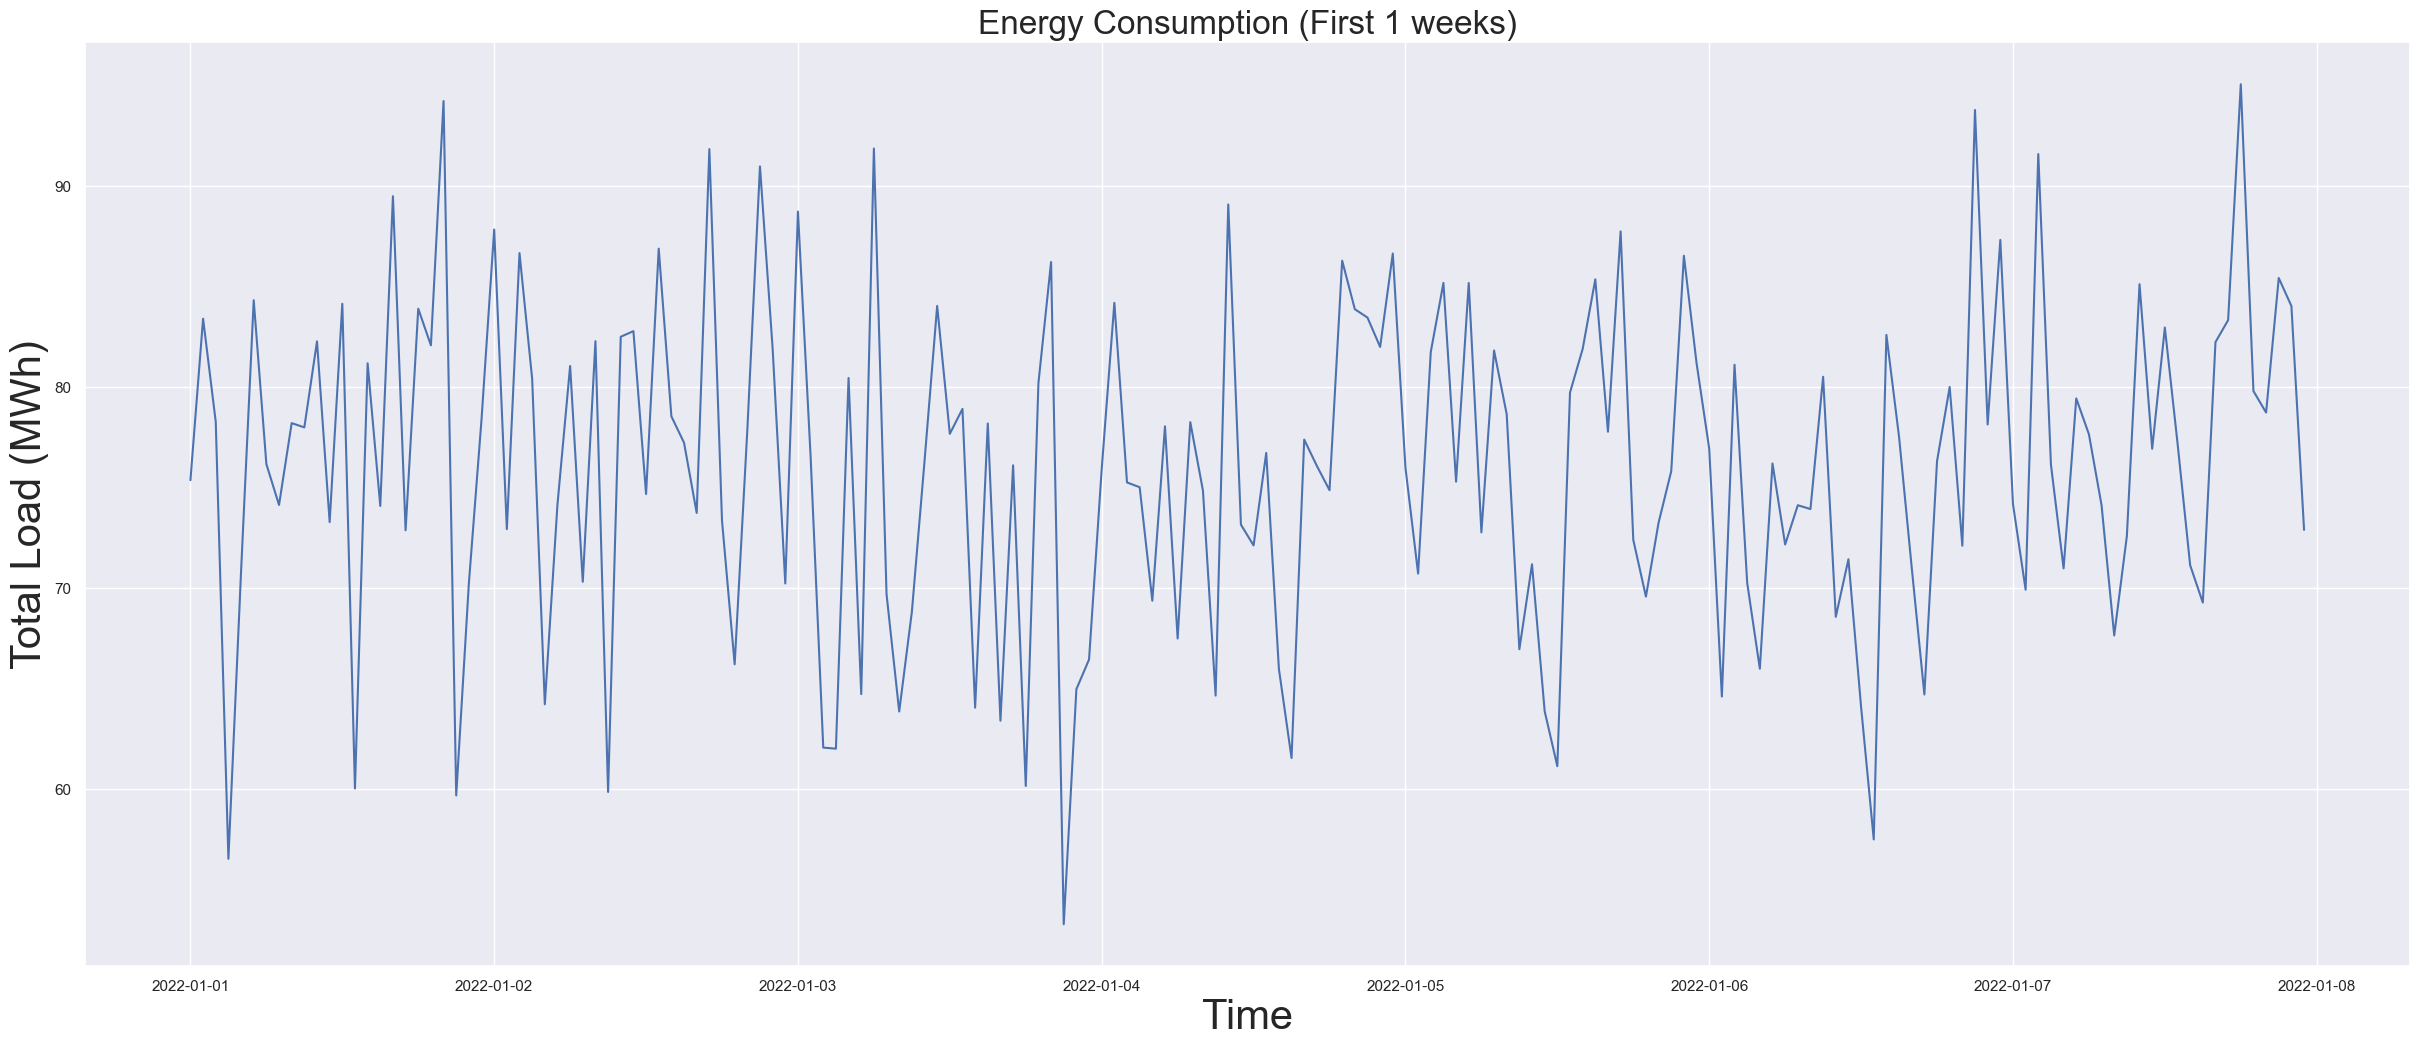

In [75]:
# Zoom into the plot of the hourly (actual) total load
ax = plot_series(df=energy_df, column='EnergyConsumption', ylabel='Total Load (MWh)',
                 title='Energy Consumption (First 1 weeks)', end=24*7)
plt.show()

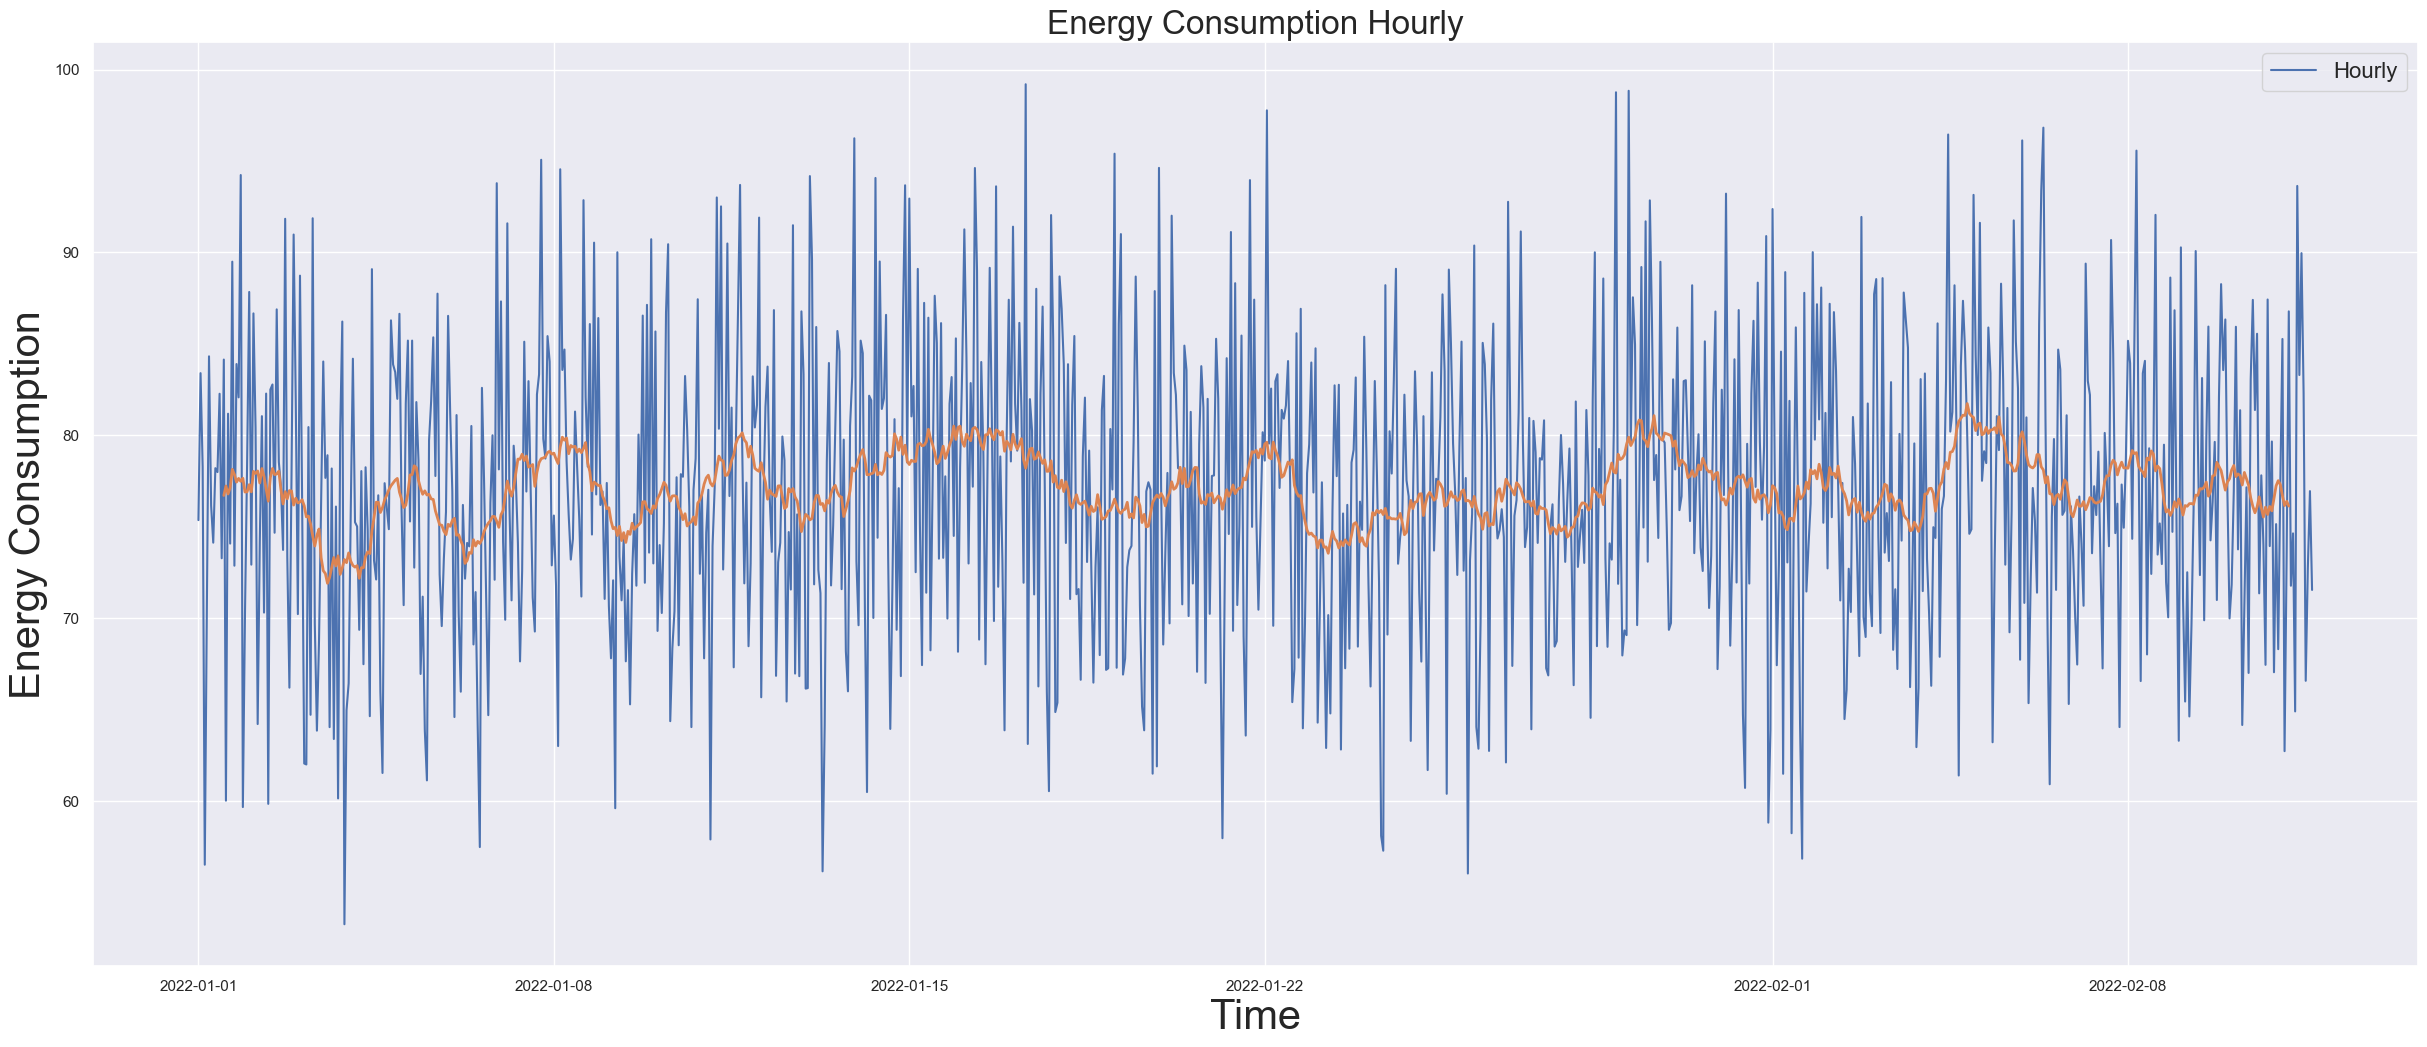

In [76]:
# Plot the hourly Energy Consumption, along with the weekly rolling mean
rolling = energy_df['EnergyConsumption'].rolling(24, center=True).mean()
ax = plot_series(energy_df, 'EnergyConsumption', label='Hourly', ylabel='Energy Consumption',
                 title='Energy Consumption Hourly')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

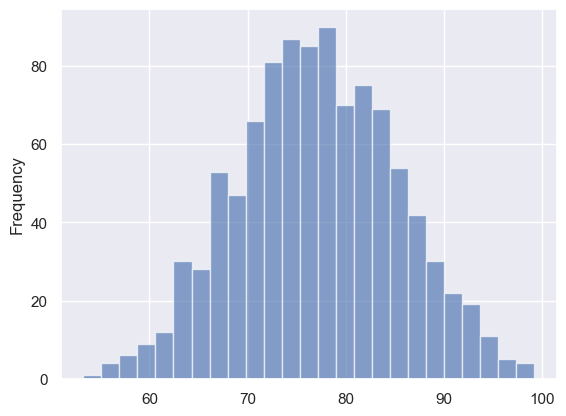

In [77]:
# Plot the histogram of the Energy Consumption

ax = energy_df['EnergyConsumption'].plot.hist(bins=25, alpha=0.65)

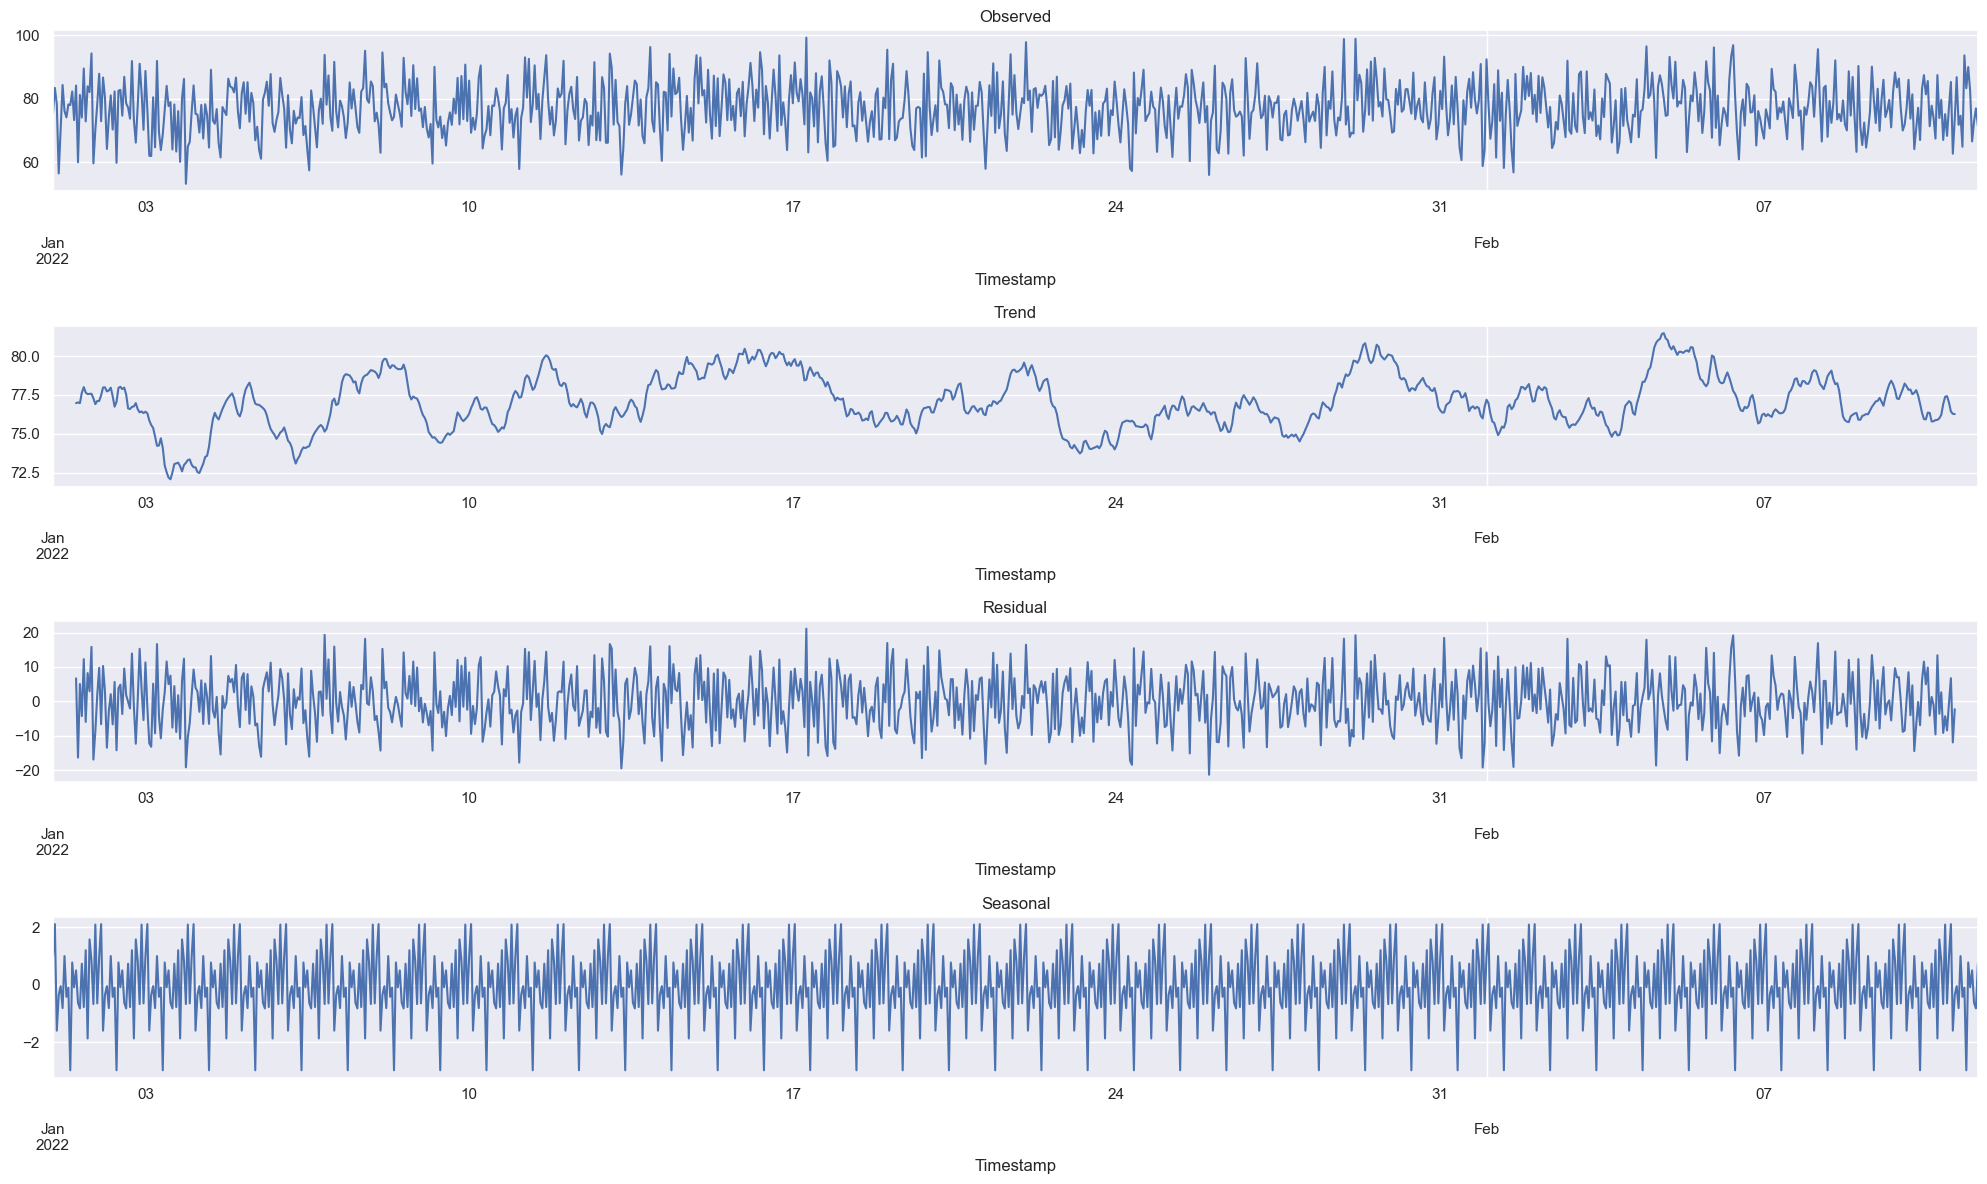

In [78]:
# Decompose the Energy Consumption time series
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(energy_df['EnergyConsumption'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [79]:
def show_raw_visualization(data, nrows, width, height):
    #time_data1 = data.index
    fig, axes = plt.subplots(
        nrows=nrows, ncols=2, figsize=(width, height), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = data.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(key, titles[i]),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


In [80]:
colors = ["blue", "orange", "green", "red"]
titles = [ 'Temperature', 'Humidity', 'EnergyConsumption', 'RenewableEnergy']

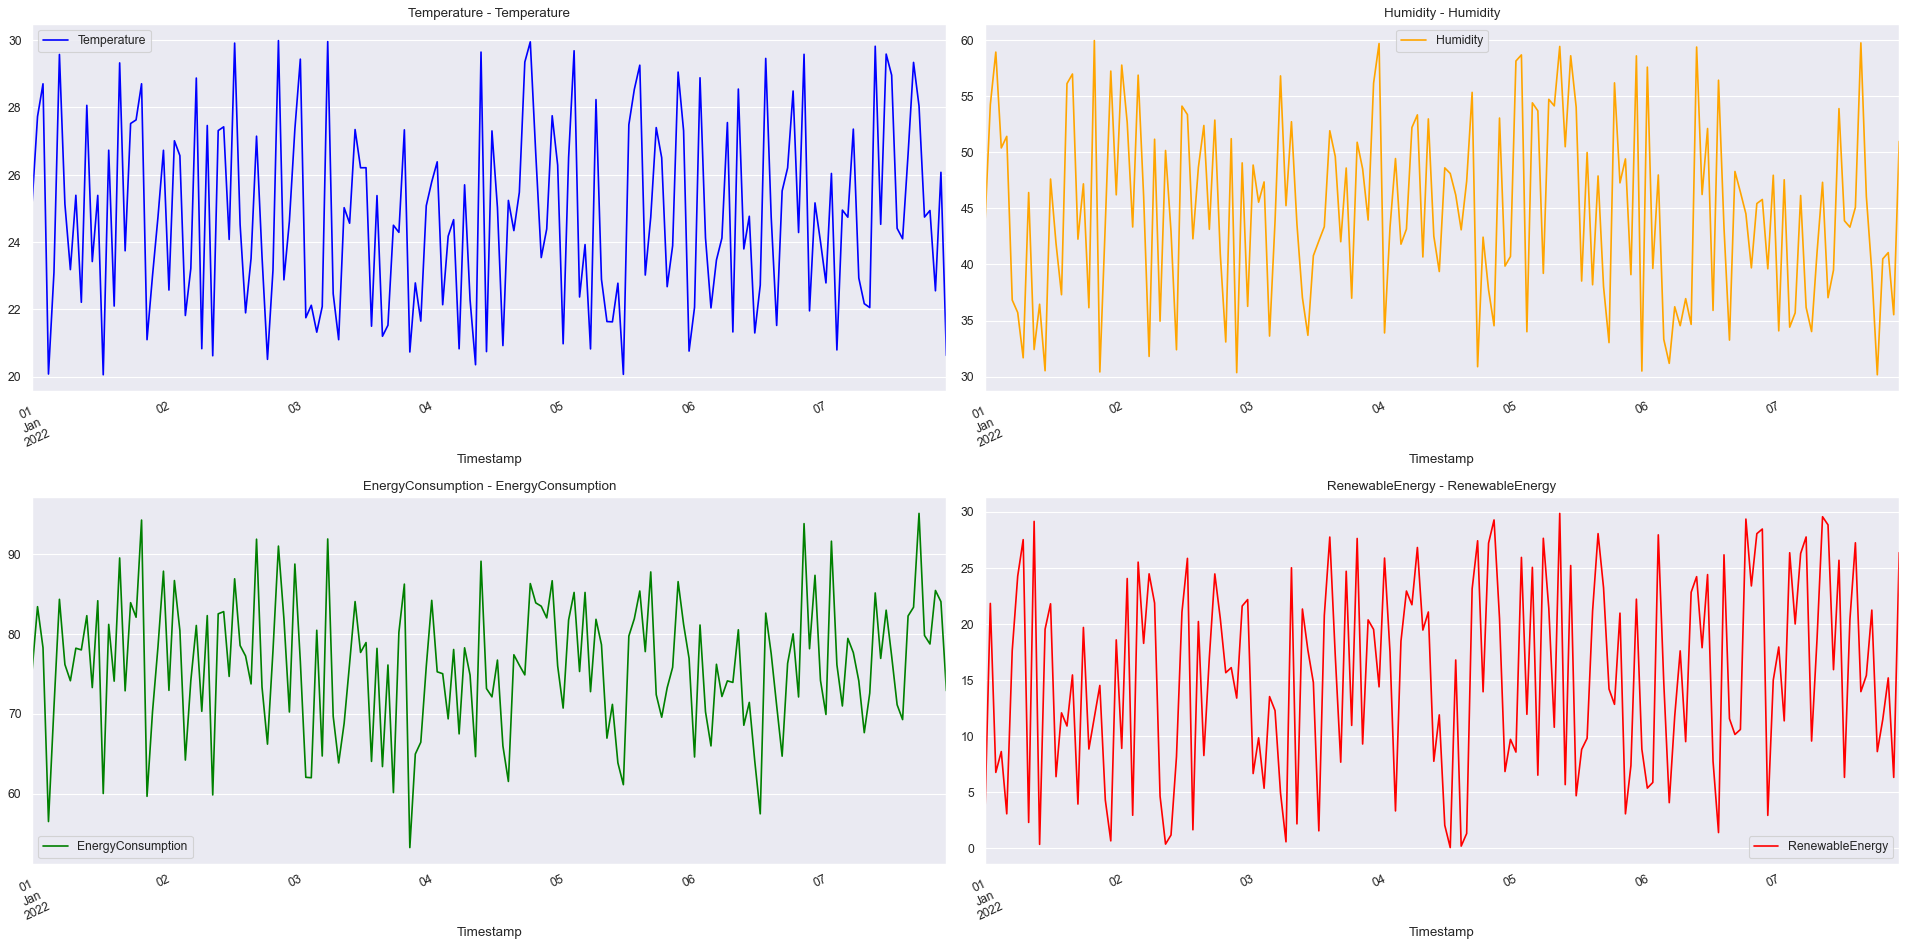

In [81]:
feature_keys = ['Temperature', 'Humidity', 'EnergyConsumption', 'RenewableEnergy']
show_raw_visualization(energy_df[:24*7],nrows=2,width=24,height=12)

In [82]:
energy_df.isnull().sum().sum()

0

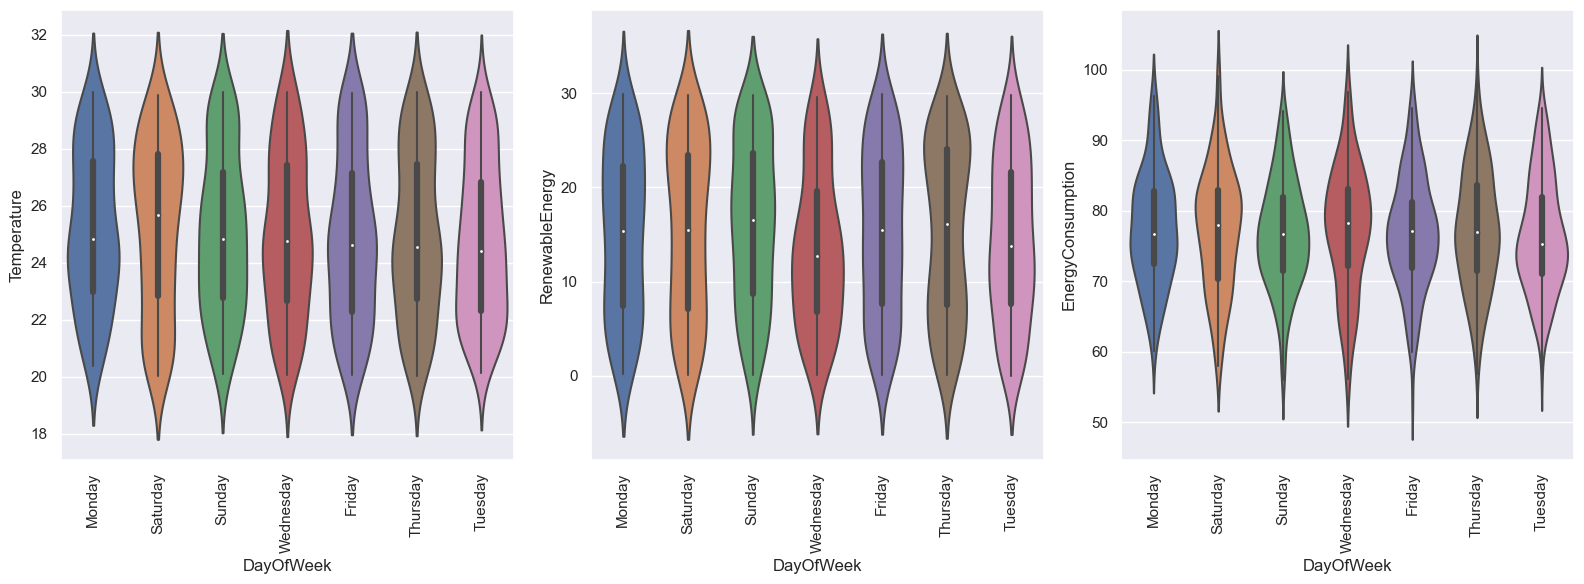

In [83]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'DayOfWeek', y = 'Temperature', data = energy_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,2)
sns.violinplot(x = 'DayOfWeek', y = 'RenewableEnergy', data = energy_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,3)
sns.violinplot(x = 'DayOfWeek', y = 'EnergyConsumption', data = energy_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [84]:
import plotly.express as px
import plotly.figure_factory as ff

fig = px.box(data_frame = energy_df,
            x = "EnergyConsumption",
            width = 1000,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [85]:
fig = px.box(data_frame = energy_df,
            x = "RenewableEnergy",
            width = 1000,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [86]:
fig = px.box(data_frame = energy_df,
            x = "Temperature",
            width = 1000,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [87]:
cat = energy_df.select_dtypes(include="object")
cat

,HVACUsage,LightingUsage,DayOfWeek,Holiday
Timestamp,,,,
2022-01-01 00:00:00+00:00,On,Off,Monday,No
2022-01-01 01:00:00+00:00,On,On,Saturday,No
2022-01-01 02:00:00+00:00,Off,Off,Sunday,No
2022-01-01 03:00:00+00:00,Off,On,Wednesday,No
2022-01-01 04:00:00+00:00,On,Off,Friday,No
...,...,...,...,...
2022-02-11 11:00:00+00:00,Off,Off,Saturday,No
2022-02-11 12:00:00+00:00,Off,On,Tuesday,Yes
2022-02-11 13:00:00+00:00,Off,On,Friday,Yes


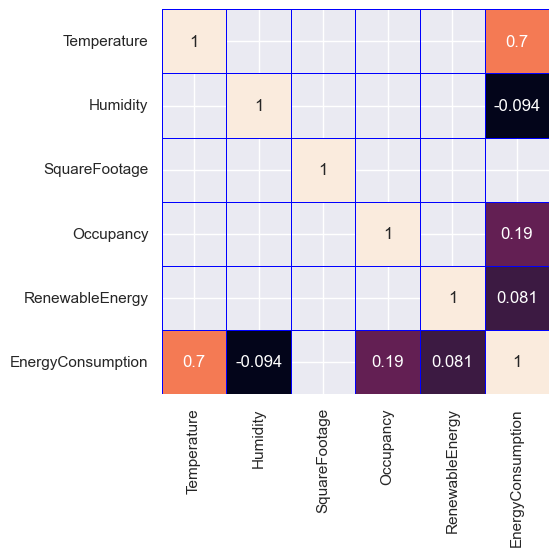

In [88]:
df=energy_df.drop(cat,axis=1).corr()
plt.figure(figsize=(5, 5))
sns.heatmap(df[(df>0.05)|(df<-0.05)],annot=True,cbar=False,linewidth=0.5,linecolor='blue');

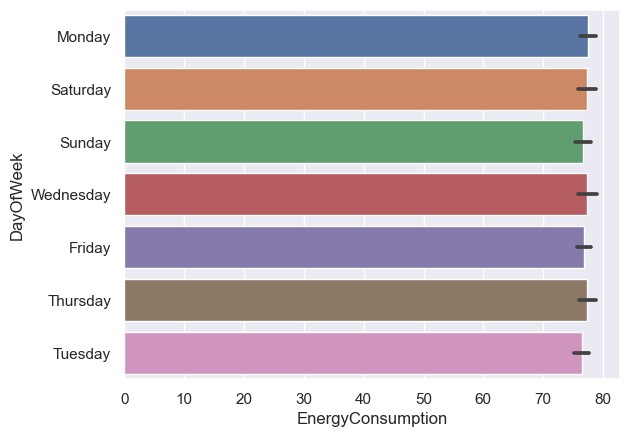

In [89]:
sns.barplot(data=energy_df,y="DayOfWeek", x="EnergyConsumption");

In [90]:
energy_df.EnergyConsumption.skew()

0.027398907453860765

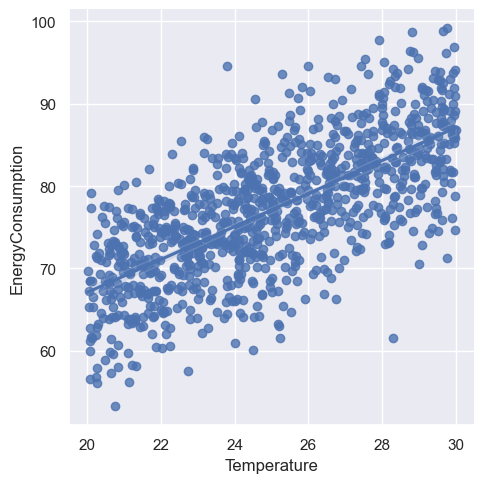

In [91]:
sns.lmplot(x ='Temperature', y ='EnergyConsumption', data = energy_df);

In [92]:
energy_df.dtypes

Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

In [93]:
energy_df.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [94]:
from sklearn.preprocessing import LabelEncoder
object_cols = cat
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(energy_df[col])
    energy_df[col] = label_encoder.transform(energy_df[col])

In [95]:
#energy_df.set_index(['Timestamp'], inplace = True)

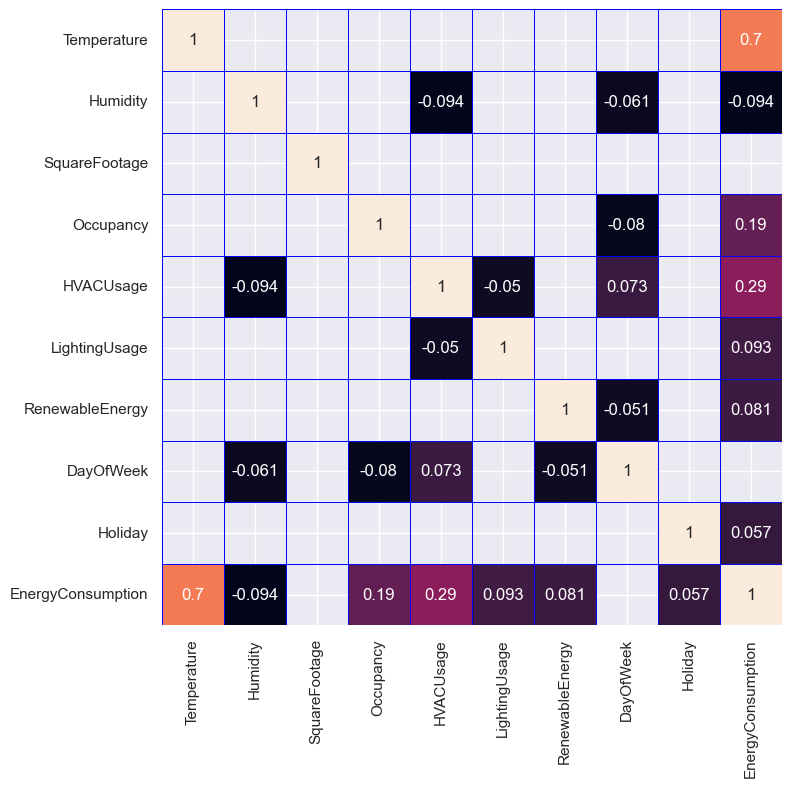

In [96]:
df=energy_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(df[(df>0.05)|(df<-0.05)],annot=True,cbar=False,linewidth=0.5,linecolor='blue');

In [97]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

n_splits = 5


kf = TimeSeriesSplit(n_splits=n_splits)
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']

mae_scores = []
for train_idx, val_idx in kf.split(energy_df):
    X_train, X_val = energy_df[features].iloc[train_idx], energy_df[features].iloc[val_idx]
    y_train, y_val = energy_df['EnergyConsumption'].iloc[train_idx], energy_df['EnergyConsumption'].iloc[val_idx]

    model = XGBRegressor(enable_categorical=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    

mae_scores = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)


print(f"\033[031m\033[1m")
print("MAE scores for each fold:", mae_scores)
print(f"\033[034m\033[1m")
print(f"Mean MAE: {mean_mae:.2f} ± {std_mae:.2f}")


MAE scores for each fold: [4.79789324 4.70158302 4.97491826 4.54804933 4.44352155]

Mean MAE: 4.69 ± 0.19


In [98]:
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import  LGBMRegressor
from sklearn.metrics import mean_absolute_error
n_splits = 5


kf = TimeSeriesSplit(n_splits=n_splits)
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']

best_params = {
    'n_iter': 200,
    'verbosity': -1,
    'colsample_bytree': 0.989,
    'colsample_bynode': 0.747,
    'max_depth': 8,
    'learning_rate': 0.098,
    'lambda_l1': 0.485,
    'lambda_l2': 0.418,
    'num_leaves': 159,
    'min_data_in_leaf': 4,
}



mae_scores = []
for train_idx, val_idx in kf.split(energy_df):
    X_train, X_val = energy_df[features].iloc[train_idx], energy_df[features].iloc[val_idx]
    y_train, y_val = energy_df['EnergyConsumption'].iloc[train_idx], energy_df['EnergyConsumption'].iloc[val_idx]

    model = LGBMRegressor(**best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    

mae_scores = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)


print(f"\033[031m\033[1m")
print("MAE scores for each fold:", mae_scores)
print(f"\033[034m\033[1m")
print(f"Mean MAE: {mean_mae:.2f} ± {std_mae:.2f}")


MAE scores for each fold: [4.48771554 4.68982733 5.05713475 4.45540972 4.55015465]

Mean MAE: 4.65 ± 0.22


In [99]:
import joblib
import os

# Create the "model" folder automatically if it doesn't exist
model_folder = "model"
os.makedirs(model_folder, exist_ok=True)

# Define the file path
model_path = os.path.join(model_folder, "energy_consumption_model.pkl")

# Save the trained model
joblib.dump(model, model_path)

print(f"✅ Model saved successfully in: {model_path}")


✅ Model saved successfully in: model\energy_consumption_model.pkl


In [100]:
import joblib

# Define the model path
model_path = "model/energy_consumption_model.pkl"

# Load the trained model
loaded_model = joblib.load(model_path)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!
